# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
import rpy2

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load the FBM cells

In [4]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20200713.h5ad')

In [5]:
adata.raw = adata

In [6]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T cell                   327
CD8 T cell                   171
CD14 monocyte               8787
CD56 bright NK               540
CMP                          425
DC1                           50
DC2                          598
DC3                          705
DC precursor                 201
ELP                         1358
GMP                         1285
HSC                           92
ILC precursor                 67
LMPP                          34
MEMP                          16
MEP                          269
MK                          1036
MOP                         3990
MPP myeloid                   92
NK T cell                    111
NK progenitor                 26
Treg                          62
adipo-CAR                    359
arteriolar fibroblast         84
basophil                     139
chondrocyte                   81
early MK                    1665
early erythroid             7534
early osteoblast             291
endosteal fibroblast          5

In [7]:
celltypes = ['HSC', 'LMPP', 'ELP', 'pre pro B progenitor', 'pro B progenitor', 'pre B progenitor', 
             'immature B cell', 'naive B cell']

In [8]:
adata = adata[adata.obs['cell.labels'].isin(celltypes)].copy()

In [9]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
ELP                      1358
HSC                        92
LMPP                       34
immature B cell          1998
naive B cell             1423
pre B progenitor        14234
pre pro B progenitor     5428
pro B progenitor         5530
dtype: int64

In [10]:
adata.obs["tissue"] = "fbm"
adata.obs["tissue_cell.labels"] = adata.obs["tissue"].astype(str) + '_' + adata.obs["cell.labels"].astype(str)

In [11]:
cell_numbers = adata.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
fbm_ELP                      1358
fbm_HSC                        92
fbm_LMPP                       34
fbm_immature B cell          1998
fbm_naive B cell             1423
fbm_pre B progenitor        14234
fbm_pre pro B progenitor     5428
fbm_pro B progenitor         5530
dtype: int64

In [12]:
fbm = adata

# Load the ABM cells

In [13]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/adult_bm/data/abm_raw_dr_20200717.h5ad')

In [14]:
adata.raw = adata

In [15]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD14 monocyte             3670
CD16 monocyte             1938
CD56 bright NK            1228
CLP                        882
CMP                        288
DC1                        135
DC2                        481
DC3                        550
DC precursor               462
HSC                        497
LMPP                        80
MEMP                       785
MK                         577
MOP                       1440
MPP                        365
Treg                      6327
early MK                   136
early erythroid           5441
erythroid macrophage        77
immature B cell           2728
late erythroid            1150
mature CD8 T cell        15725
mature NK                 6074
memory B cell             4106
memory CD4 T cell        22197
mid erythroid             2192
monocyte-DC                515
myelocyte                 6675
myeloid DC progenitor      110
naive B cell             19265
naive CD4 T cell          5873
naive CD8 T cell          8

In [16]:
celltypes = ['HSC', 'LMPP', 'pro B progenitor', 'pre B cell', 'immature B cell', 'naive B cell']

In [17]:
adata = adata[adata.obs['cell.labels'].isin(celltypes)].copy()

In [18]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
HSC                   497
LMPP                   80
immature B cell      2728
naive B cell        19265
pre B cell            971
pro B progenitor     1390
dtype: int64

In [19]:
adata.shape

(24931, 33694)

In [20]:
adata.obs["tissue"] = "abm"
adata.obs["tissue_cell.labels"] = adata.obs["tissue"].astype(str) + '_' + adata.obs["cell.labels"].astype(str)

In [21]:
cell_numbers = adata.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
abm_HSC                   497
abm_LMPP                   80
abm_immature B cell      2728
abm_naive B cell        19265
abm_pre B cell            971
abm_pro B progenitor     1390
dtype: int64

In [22]:
abm = adata

# Combine the FBM and ABM eryth cells

In [23]:
merged =fbm.concatenate(abm, index_unique=None, join='outer')

In [24]:
merged.shape

(55028, 33712)

In [25]:
cell_numbers = merged.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
abm_HSC                       497
abm_LMPP                       80
abm_immature B cell          2728
abm_naive B cell            19265
abm_pre B cell                971
abm_pro B progenitor         1390
fbm_ELP                      1358
fbm_HSC                        92
fbm_LMPP                       34
fbm_immature B cell          1998
fbm_naive B cell             1423
fbm_pre B progenitor        14234
fbm_pre pro B progenitor     5428
fbm_pro B progenitor         5530
dtype: int64

In [26]:
adata = merged

In [27]:
adata.shape

(55028, 33712)

In [28]:
adata.X

<55028x33712 sparse matrix of type '<class 'numpy.float32'>'
	with 90898950 stored elements in Compressed Sparse Row format>

In [29]:
adata.X = np.nan_to_num(adata.X, copy=False)

In [30]:
adata.X

<55028x33712 sparse matrix of type '<class 'numpy.float32'>'
	with 90898950 stored elements in Compressed Sparse Row format>

# Pre-process the dataset

In [31]:
# normalise count data 
sc.pp.normalize_total(adata)

In [32]:
# log the count data 
sc.pp.log1p(adata)

In [33]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [34]:
# scale the data 
sc.pp.scale(adata, max_value=10)

In [35]:
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

# Get monocle3 metadata (for both FBM and ABM) and save into obj

In [36]:
# load DS eryth metadata
fbm_metadata = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/bcell_monocle3_pst_metadata_20200715.csv")
fbm_metadata.index=fbm_metadata["Unnamed: 0"]

# load non-DS metadata
abm_metadata = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/abm_bcell_monocle3_pst_metadata_20200717.csv")
abm_metadata.index=abm_metadata["Unnamed: 0"]

In [37]:
# add metadata into obj
adata.obs["fbm_monocle3_pst_val"] = fbm_metadata["cell_color"]
adata.obs["fbm_monocle3_pst_val"] = adata.obs["fbm_monocle3_pst_val"].replace(np.inf, np.nan)

adata.obs["abm_monocle3_pst_val"] = abm_metadata["cell_color"]
adata.obs["abm_monocle3_pst_val"] = adata.obs["abm_monocle3_pst_val"].replace(np.inf, np.nan)

# Save obj

In [38]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig3e_figs3e_combined_fbm_abm_bcell_dr_20200717.h5ad")

... storing 'age' as categorical
... storing 'april_cell.labels' as categorical
... storing 'auto_prd' as categorical
... storing 'cell.labels' as categorical
... storing 'cell.labels2' as categorical
... storing 'cell.labels_20200708' as categorical
... storing 'cell.labels_20200713' as categorical
... storing 'cell.labels_20200717' as categorical
... storing 'cell.labels_july' as categorical
... storing 'doublets' as categorical
... storing 'ethnicity' as categorical
... storing 'fetal.ids' as categorical
... storing 'gender' as categorical
... storing 'is_doublet' as categorical
... storing 'is_doublet_poptrim' as categorical
... storing 'is_doublet_wolock' as categorical
... storing 'lanes' as categorical
... storing 'leiden' as categorical
... storing 'mad_prd' as categorical
... storing 'orig.ident' as categorical
... storing 'processing.type' as categorical
... storing 'sample' as categorical
... storing 'sequencing.type' as categorical
... storing 'sex' as categorical
... stori

# Run plots for genes over pseudotime

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
import rpy2

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig3e_figs3e_combined_fbm_abm_bcell_dr_20200717.h5ad")

In [5]:
cell_numbers = adata.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
abm_HSC                       497
abm_LMPP                       80
abm_immature B cell          2728
abm_naive B cell            19265
abm_pre B cell                971
abm_pro B progenitor         1390
fbm_ELP                      1358
fbm_HSC                        92
fbm_LMPP                       34
fbm_immature B cell          1998
fbm_naive B cell             1423
fbm_pre B progenitor        14234
fbm_pre pro B progenitor     5428
fbm_pro B progenitor         5530
dtype: int64

# Plot eryth-poiesis genes over heatmap

In [6]:
genes = ['RUNX1', 
'CD200',
'IKZF1',
'AFF1',
'MLLT3',
'ETV6',
'EBF1',
'CRLF2',
'MLLT1',
'PAX5',
'KMT2A',
'TCF3',
'IKZF2',
'BTG1',
'IKZF3',
'BTLA']

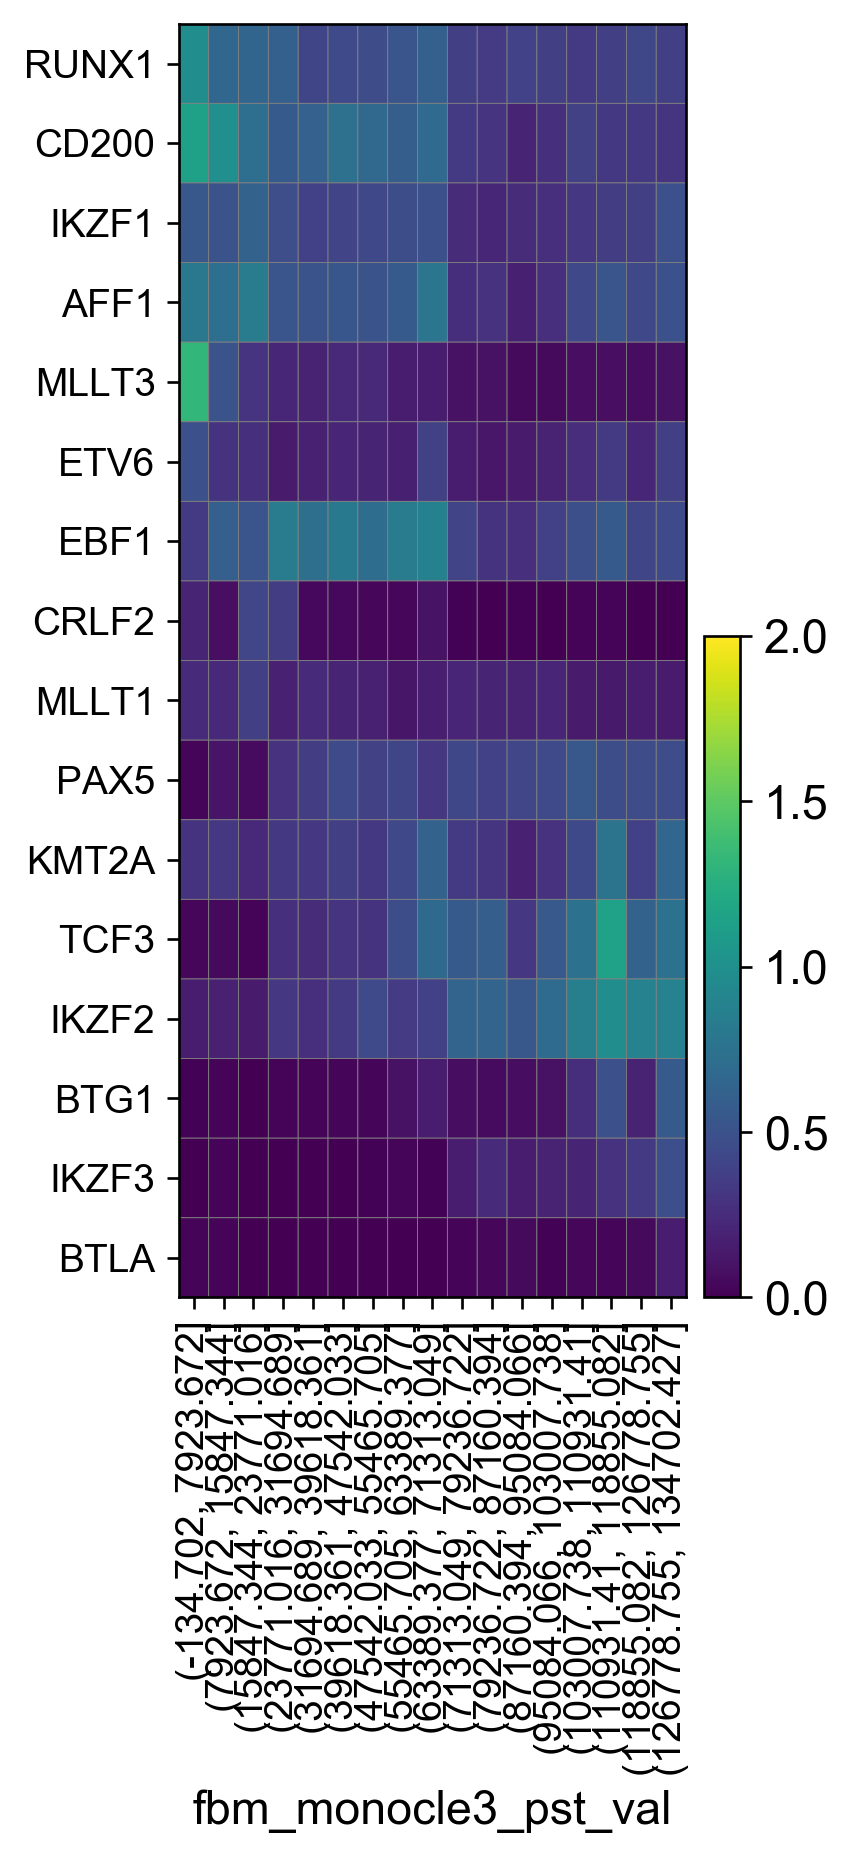

In [7]:
fbm_celltypes = ['fbm_HSC', 'fbm_LMPP', 'fbm_ELP', 'fbm_pre pro B progenitor', 'fbm_pro B progenitor', 
                 'fbm_pre B progenitor', 'fbm_immature B cell', 'fbm_naive B cell']

fbm_subset = adata[adata.obs['tissue_cell.labels'].isin(fbm_celltypes)].copy()

gs = sc.pl.matrixplot(fbm_subset, var_names=genes, save="fbm_bcell_pst_genes_20200726.pdf", 
                      num_categories=17, 
                      groupby='fbm_monocle3_pst_val', swap_axes=True, use_raw=False, figsize=[3,7], vmax=2)

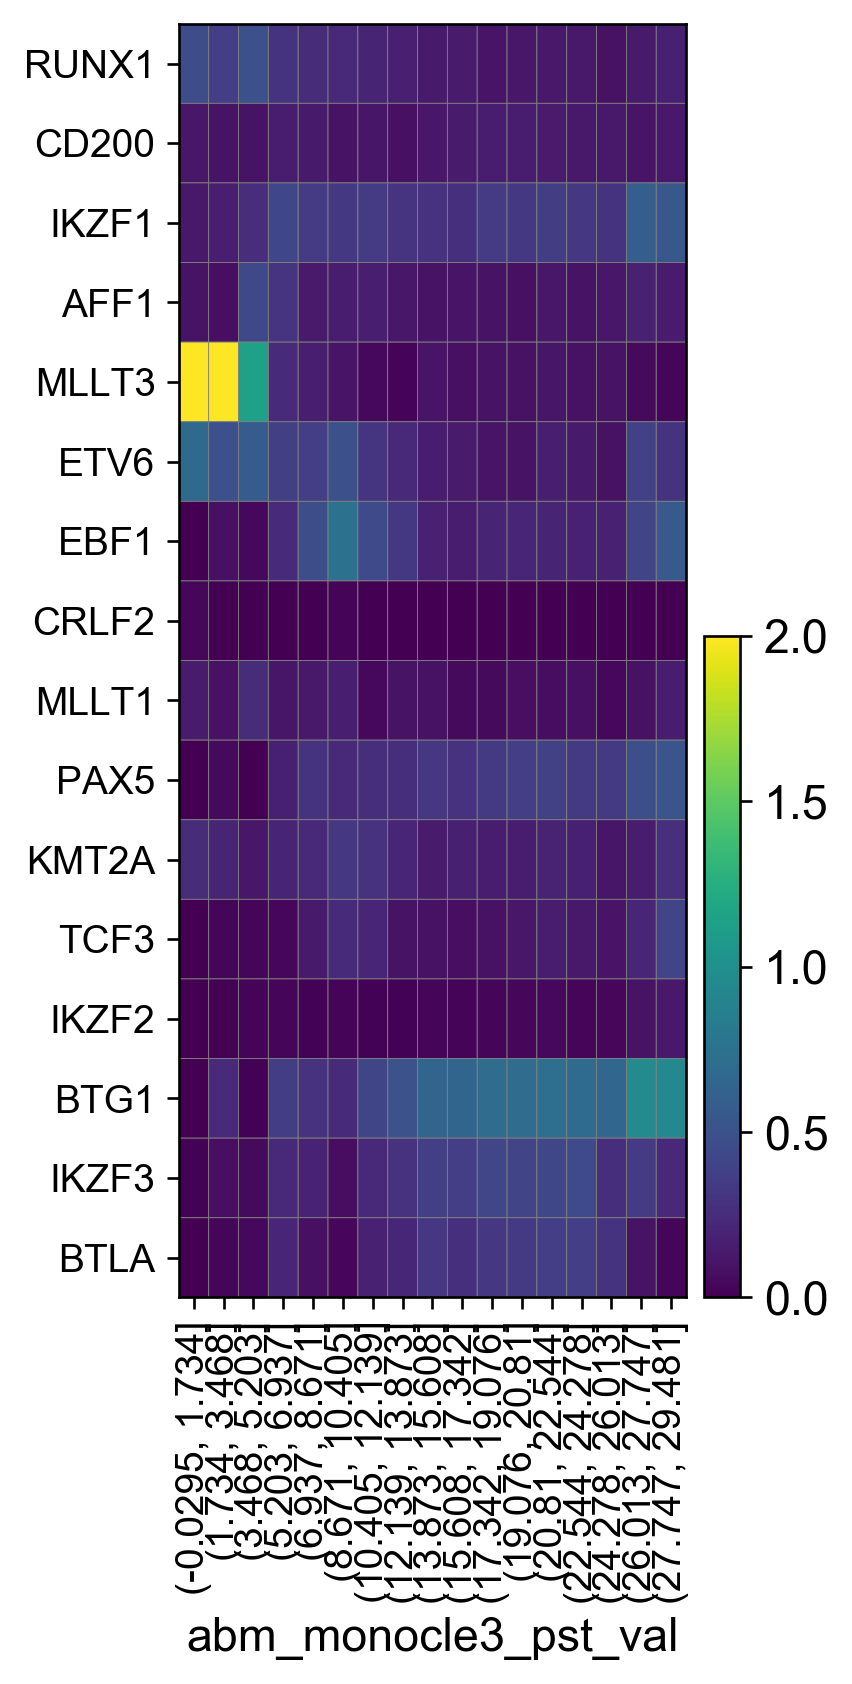

In [8]:
abm_celltypes = ['abm_HSC', 'abm_LMPP', 'abm_pro B progenitor', 
                 'abm_pre B progenitor', 'abm_immature B cell', 'abm_naive B cell']

abm_subset = adata[adata.obs['tissue_cell.labels'].isin(abm_celltypes)].copy()

gs = sc.pl.matrixplot(abm_subset, var_names=genes, save="abm_bcell_pst_genes_20200726.pdf", 
                      num_categories=17, 
                      groupby='abm_monocle3_pst_val', swap_axes=True, use_raw=False, figsize=[3,7], vmax=2)

# Plot density plots

fbm_HSC
#b63262
fbm_LMPP
#1B6633
fbm_ELP
#F9F06C
fbm_pre pro B progenitor
#F59771
fbm_pro B progenitor
#C8D895
fbm_pre B progenitor
#4C79BC
fbm_immature B cell
#A9479A
fbm_naive B cell
#F3C3DB


/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


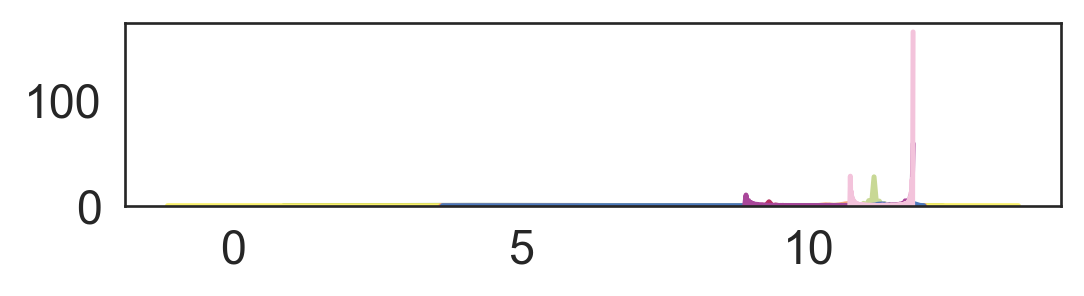

In [9]:
df = pd.DataFrame(fbm_subset.obs)
mpl.rcParams['figure.figsize'] = 5, 1

celltype_list=['fbm_HSC', 'fbm_LMPP', 'fbm_ELP', 'fbm_pre pro B progenitor', 'fbm_pro B progenitor', 
                 'fbm_pre B progenitor', 'fbm_immature B cell', 'fbm_naive B cell']
colour_list = ['#b63262', '#1B6633', '#F9F06C', '#F59771', '#C8D895', '#4C79BC', '#A9479A', '#F3C3DB']
j=-1
sns.set_style("white")

for i in celltype_list:
    print(i)
    j=j+1
    print(colour_list[j])
    subset_df=df[df["tissue_cell.labels"]==i]
    ax=sns.kdeplot(np.log(subset_df["fbm_monocle3_pst_val"]), color=colour_list[j], legend=False)

plt.show()
fig = ax.get_figure()
fig.savefig('/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/useful_scripts/fig3_lymphoid/figures/fbm_bcell_pst_celltypes_20200726.pdf')

abm_HSC
#b63262
abm_LMPP
#1B6633
abm_pro B progenitor
#C8D895
abm_pre B progenitor
#4C79BC
abm_immature B cell
#A9479A
abm_naive B cell
#F3C3DB


/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


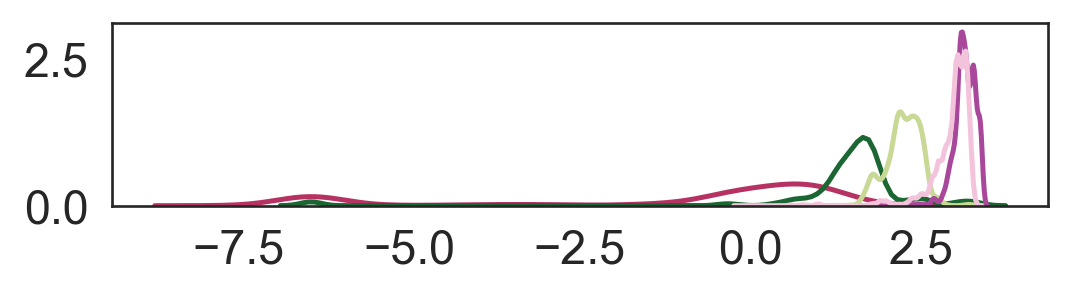

In [10]:
df = pd.DataFrame(abm_subset.obs)
mpl.rcParams['figure.figsize'] = 5, 1

celltype_list=['abm_HSC', 'abm_LMPP', 'abm_pro B progenitor', 
                 'abm_pre B progenitor', 'abm_immature B cell', 'abm_naive B cell']
colour_list = ['#b63262', '#1B6633', '#C8D895', '#4C79BC', '#A9479A', '#F3C3DB']
j=-1
sns.set_style("white")

for i in celltype_list:
    print(i)
    j=j+1
    print(colour_list[j])
    subset_df=df[df["tissue_cell.labels"]==i]
    ax=sns.kdeplot(np.log(subset_df["abm_monocle3_pst_val"]), color=colour_list[j], legend=False)

plt.show()
fig = ax.get_figure()
fig.savefig('/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/useful_scripts/fig3_lymphoid/figures/abm_bcell_pst_celltypes_20200726.pdf')